<a href="https://colab.research.google.com/github/Cotaquispe/alura_store_challenge/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Crear diccionario vacío
datos_tiendas = {}

# Registrar ingresos
ingresos = {
    "Tienda 1": float(tienda['Precio'].sum()),
    "Tienda 2": float(tienda2['Precio'].sum()),
    "Tienda 3": float(tienda3['Precio'].sum()),
    "Tienda 4": float(tienda4['Precio'].sum())
}

print(ingresos)

{'Tienda 1': 1150880400.0, 'Tienda 2': 1116343500.0, 'Tienda 3': 1098019600.0, 'Tienda 4': 1038375700.0}


In [ ]:
# Guardar ingresos en el diccionario
for nombre_tienda, ingreso in ingresos.items():
    print(f"{nombre_tienda}: ${ingreso}")
    datos_tiendas[nombre_tienda] = {'Ingresos': ingreso}

print(datos_tiendas)

Tienda 1: $1150880400.0
Tienda 2: $1116343500.0
Tienda 3: $1098019600.0
Tienda 4: $1038375700.0
{'Tienda 1': {'Ingresos': 1150880400.0}, 'Tienda 2': {'Ingresos': 1116343500.0}, 'Tienda 3': {'Ingresos': 1098019600.0}, 'Tienda 4': {'Ingresos': 1038375700.0}}


# 2. Ventas por categoría

In [ ]:
# Función para agrupar y contar las repeticiones de la categoria y guardar en el diccionario
def contar_por_categoria(df, nombre_tienda):
    contar = df["Categoría del Producto"].value_counts().idxmax()
    print(f"\n Categoría más vendida en {nombre_tienda}: {contar}")
    datos_tiendas[nombre_tienda]['Categoría más Vendida'] = contar

# Ejecutamos para cada tienda
contar_por_categoria(tienda, "Tienda 1")
contar_por_categoria(tienda2, "Tienda 2")
contar_por_categoria(tienda3, "Tienda 3")
contar_por_categoria(tienda4, "Tienda 4")


 Categoría más vendida en Tienda 1: Muebles

 Categoría más vendida en Tienda 2: Muebles

 Categoría más vendida en Tienda 3: Muebles

 Categoría más vendida en Tienda 4: Muebles


In [ ]:
print(datos_tiendas)

{'Tienda 1': {'Ingresos': 1150880400.0, 'Categoría más Vendida': 'Muebles'}, 'Tienda 2': {'Ingresos': 1116343500.0, 'Categoría más Vendida': 'Muebles'}, 'Tienda 3': {'Ingresos': 1098019600.0, 'Categoría más Vendida': 'Muebles'}, 'Tienda 4': {'Ingresos': 1038375700.0, 'Categoría más Vendida': 'Muebles'}}


# 3. Calificación promedio de la tienda


In [ ]:
# Funcion para calcular el promedio y guardar en el diccionario
def promedio_calificacion(df, nombre_tienda):
    promedio = float(round(df["Calificación"].mean(), 2))
    print(f"Calificación promedio de la tienda {nombre_tienda}: {promedio}")
    datos_tiendas[nombre_tienda]['Calificación Promedio'] = promedio

# Ejecutamos la función
promedio_calificacion(tienda, "Tienda 1")
promedio_calificacion(tienda2, "Tienda 2")
promedio_calificacion(tienda3, "Tienda 3")
promedio_calificacion(tienda4, "Tienda 4")

Calificación promedio de la tienda Tienda 1: 3.98
Calificación promedio de la tienda Tienda 2: 4.04
Calificación promedio de la tienda Tienda 3: 4.05
Calificación promedio de la tienda Tienda 4: 4.0


In [ ]:
print(datos_tiendas)

{'Tienda 1': {'Ingresos': 1150880400.0, 'Categoría más Vendida': 'Muebles', 'Calificación Promedio': 3.98}, 'Tienda 2': {'Ingresos': 1116343500.0, 'Categoría más Vendida': 'Muebles', 'Calificación Promedio': 4.04}, 'Tienda 3': {'Ingresos': 1098019600.0, 'Categoría más Vendida': 'Muebles', 'Calificación Promedio': 4.05}, 'Tienda 4': {'Ingresos': 1038375700.0, 'Categoría más Vendida': 'Muebles', 'Calificación Promedio': 4.0}}


# 4. Productos más y menos vendidos

In [ ]:
# Función para identificar el producto más y menos vendido y agregar al diccionario
def producto_mas_menos(df, nombre_tienda):
    conteo = df["Producto"].value_counts()
    mas_vendida = conteo.idxmax()
    menos_vendida = conteo.idxmin()
    print(f"La producto más vendida en {nombre_tienda}: {mas_vendida}")
    print(f"La prodcuto menos vendida en {nombre_tienda}: {menos_vendida}")
    datos_tiendas[nombre_tienda]['Producto Más Vendida'] = mas_vendida
    datos_tiendas[nombre_tienda]['Producto Menos Vendida'] = menos_vendida

producto_mas_menos(tienda, "Tienda 1")
producto_mas_menos(tienda2, "Tienda 2")
producto_mas_menos(tienda3, "Tienda 3")
producto_mas_menos(tienda4, "Tienda 4")

La producto más vendida en Tienda 1: Microondas
La prodcuto menos vendida en Tienda 1: Auriculares con micrófono
La producto más vendida en Tienda 2: Iniciando en programación
La prodcuto menos vendida en Tienda 2: Juego de mesa
La producto más vendida en Tienda 3: Kit de bancas
La prodcuto menos vendida en Tienda 3: Bloques de construcción
La producto más vendida en Tienda 4: Cama box
La prodcuto menos vendida en Tienda 4: Guitarra eléctrica


In [ ]:
print(datos_tiendas)


{'Tienda 1': {'Ingresos': 1150880400.0, 'Categoría más Vendida': 'Muebles', 'Calificación Promedio': 3.98, 'Producto Más Vendida': 'Microondas', 'Producto Menos Vendida': 'Auriculares con micrófono'}, 'Tienda 2': {'Ingresos': 1116343500.0, 'Categoría más Vendida': 'Muebles', 'Calificación Promedio': 4.04, 'Producto Más Vendida': 'Iniciando en programación', 'Producto Menos Vendida': 'Juego de mesa'}, 'Tienda 3': {'Ingresos': 1098019600.0, 'Categoría más Vendida': 'Muebles', 'Calificación Promedio': 4.05, 'Producto Más Vendida': 'Kit de bancas', 'Producto Menos Vendida': 'Bloques de construcción'}, 'Tienda 4': {'Ingresos': 1038375700.0, 'Categoría más Vendida': 'Muebles', 'Calificación Promedio': 4.0, 'Producto Más Vendida': 'Cama box', 'Producto Menos Vendida': 'Guitarra eléctrica'}}


# 5. Envío promedio por tienda

In [ ]:
# Funcion para calcular el costo de envío promedio y guardar en el diccionario
def promedio_envio(df, nombre_tienda):
    promedio = float(round(df["Costo de envío"].mean(), 2))
    print(f"Costo de envío promedio de la tienda {nombre_tienda}: ${promedio}")
    datos_tiendas[nombre_tienda]['Costo Envío Promedio'] = promedio

promedio_envio(tienda, "Tienda 1")
promedio_envio(tienda2, "Tienda 2")
promedio_envio(tienda3, "Tienda 3")
promedio_envio(tienda4, "Tienda 4")

Costo de envío promedio de la tienda Tienda 1: $26018.61
Costo de envío promedio de la tienda Tienda 2: $25216.24
Costo de envío promedio de la tienda Tienda 3: $24805.68
Costo de envío promedio de la tienda Tienda 4: $23459.46


In [ ]:
print(datos_tiendas)


{'Tienda 1': {'Ingresos': 1150880400.0, 'Categoría más Vendida': 'Muebles', 'Calificación Promedio': 3.98, 'Producto Más Vendida': 'Microondas', 'Producto Menos Vendida': 'Auriculares con micrófono', 'Costo Envío Promedio': 26018.61}, 'Tienda 2': {'Ingresos': 1116343500.0, 'Categoría más Vendida': 'Muebles', 'Calificación Promedio': 4.04, 'Producto Más Vendida': 'Iniciando en programación', 'Producto Menos Vendida': 'Juego de mesa', 'Costo Envío Promedio': 25216.24}, 'Tienda 3': {'Ingresos': 1098019600.0, 'Categoría más Vendida': 'Muebles', 'Calificación Promedio': 4.05, 'Producto Más Vendida': 'Kit de bancas', 'Producto Menos Vendida': 'Bloques de construcción', 'Costo Envío Promedio': 24805.68}, 'Tienda 4': {'Ingresos': 1038375700.0, 'Categoría más Vendida': 'Muebles', 'Calificación Promedio': 4.0, 'Producto Más Vendida': 'Cama box', 'Producto Menos Vendida': 'Guitarra eléctrica', 'Costo Envío Promedio': 23459.46}}


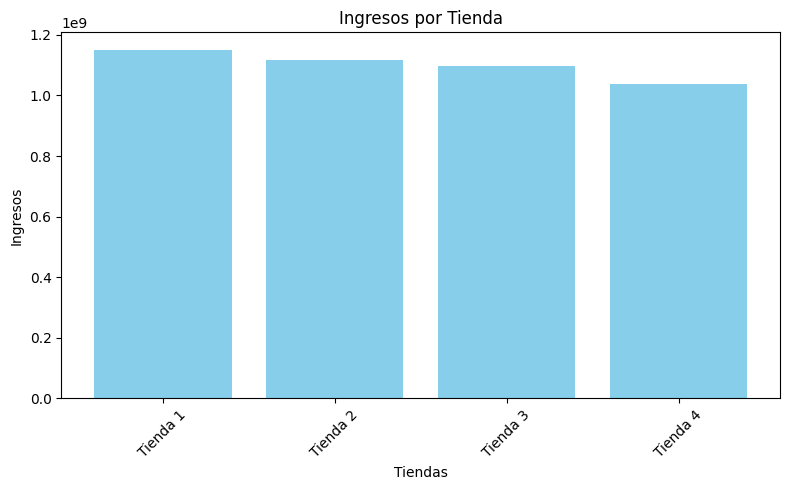

In [ ]:
import matplotlib.pyplot as plt

# Extraer nombres de tiendas e ingresos
tiendas = list(datos_tiendas.keys())
ingresos = [datos_tiendas[tienda]['Ingresos'] for tienda in tiendas]

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(tiendas, ingresos, color='skyblue')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
plt.title('Ingresos por Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

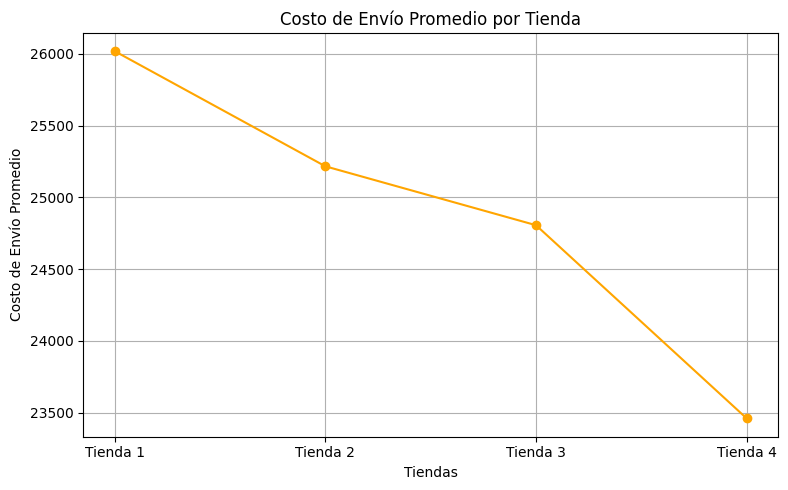

In [ ]:
# Datos para el gráfico
costos_envio = [datos_tiendas[t]['Costo Envío Promedio'] for t in tiendas]

# Gráfico de líneas
plt.figure(figsize=(8, 5))
plt.plot(tiendas, costos_envio, marker='o', linestyle='-', color='orange')
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envío Promedio')
plt.title('Costo de Envío Promedio por Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

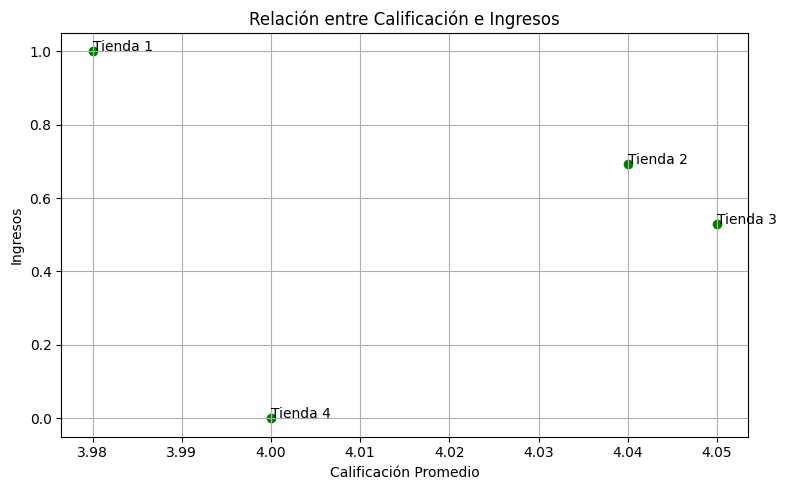

In [ ]:
calificaciones = [datos_tiendas[t]['Calificación Promedio'] for t in tiendas]

plt.figure(figsize=(8, 5))
plt.scatter(calificaciones, ingresos, color='green')

for i, tienda in enumerate(tiendas):
    plt.annotate(tienda, (calificaciones[i], ingresos[i]))

plt.xlabel('Calificación Promedio')
plt.ylabel('Ingresos')
plt.title('Relación entre Calificación e Ingresos')
plt.grid(True)
plt.tight_layout()
plt.show()

**DECISIÓN FINAL**

1. Ingresos por Tienda (Gráfico de Barras)

Tienda 1: Es la que más ingresos genera (~1,150 millones).

Tienda 4: Es la que menos ingresos genera (~1,038 millones).

*Tienda 4 es la más débil en ingresos, lo cual es un indicador importante a considerar para su eliminación.*


2. Costo de Envío Promedio (Gráfico de Línea)

Tienda 1: Tiene el costo de envío promedio más alto (~26,000).

Tienda 4: Tiene el costo de envío promedio más bajo (~23,459).

*Aquí Tienda 4 es la más eficiente, ya que tiene menor gasto en envío. Este punto es a favor de Tienda 4*



3. Calificación Promedio (Gráfico de Líneas - Imagen 3 subida)

Tienda 3: Tiene la mejor calificación (4.05).

Tienda 1 y Tienda 4: Tienen las calificaciones más bajas (~3.98 y 4.00 respectivamente).

*Tienda 4 no destaca en la satisfacción del cliente, aunque está ligeramente por encima de Tienda 1.*


**Conclusión Final: ¿Qué tienda debe eliminarse?**

Aunque LA Tienda 4 tiene el envío más económico, esta ventaja no compensa sus bajos ingresos ni su calificación promedio sin destacar. Desde un punto de vista estratégico, cerrarla permitiría enfocar recursos en tiendas con mejor desempeño financiero y de satisfacción del cliente.

En resumen:


> “Ser barato no basta si no generas ingresos ni fidelizas al cliente.”

